# Transportation Regression Model 

## 1) Import needed libraries

In [18]:
import arcpy
from arcpy import env
arcpy.env.overwriteOutput = True
import os
import csv
import math
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing 
import random
import io
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# Data path:

os.chdir(r'D:\Notebooks\ESRI-Taxi')
dfs = []

## 2) Reading Data

In [1]:

def read_big_csv():
    fnames = os.listdir("bigdata")
    percentage = 0.99        # Percentage to drop
    for i in range(len(fnames)):
        n = sum(1 for line in open("bigdata/"+fnames[i]))
        skip = sorted(random.sample(range(n), int(n*percentage)))
        dfs.append(pd.read_csv("bigdata/"+fnames[i], usecols = [1,7,8,3], header = None, skip_blank_lines=True, skiprows = skip).dropna(axis=0, how='any'))

def read_small_new_csv():
    fnames = os.listdir("data")
    percentage = 0        # Percentage to drop
    for i in range(len(fnames)):
        n = sum(1 for line in open("data/"+fnames[i]))
        skip = sorted(random.sample(range(n), int(n*percentage)))
        dfs.append(pd.read_csv("data/"+fnames[i], usecols = [1,5,6,7], header = None, skip_blank_lines=True, skiprows = skip).dropna(axis=0, how='any'))

def read_small_old_csv():
    fnames = os.listdir("old_data")
    percentage = 0        # Percentage to drop
    for i in range(len(fnames)):
        n = sum(1 for line in open("old_data/"+fnames[i]))
        skip = sorted(random.sample(range(n), int(n*percentage)))
        dfs.append(pd.read_csv("old_data/"+fnames[i], usecols = [1,5,6,7,8,9], header = None, skip_blank_lines=True, skiprows = skip).dropna(axis=0, how='any'))


In [2]:
#read_big_csv()
#read_small_new_csv()
read_small_old_csv()
## Concatenate all data into one DataFrame
df_raw = pd.concat(dfs, ignore_index=True)
#df1.columns = ['datetime', 'PUloc', 'DOloc', 'Count']
df_raw.columns = ['datetime', 'PU_lng', 'PU_lat', 'DO_lng','DO_lat','Count']

NameError: name 'os' is not defined

In [5]:
print("Data length before headers removal: ",len(df_raw), "rows")
df1 = df_raw[df_raw.datetime != 'lpep_pickup_datetime']
print("Data length after headers removal: ",len(df1), "rows")
df1.head()

Data length before headers removal:  34084609 rows
Data length after headers removal:  34084585 rows


,datetime,PU_lng,PU_lat,DO_lng,DO_lat,Count
1,2014-01-01 00:00:00,0,0,-73.865043640136719,40.872306823730469,1
2,2014-01-01 00:00:00,0,0,-73.7763671875,40.645488739013672,1
3,2014-01-01 00:00:00,0,0,-73.932647705078125,40.852573394775391,2
4,2014-01-01 00:00:00,0,0,-73.99407958984375,40.749092102050781,1
5,2014-01-01 00:00:00,0,0,-73.936065673828125,40.734725952148437,1


In [48]:
## Data Validation and Statistics ##

def validate_dataframe(df):
    print("Validation for Null/Zero entries:")
    for i in range(len(df.columns)):
        print("column",i,"\t\tZERO count:",sum(df.iloc[:,i]== 0.0), \
                         "\tNull count:",sum(df.iloc[:,i].isnull()))

validate_dataframe(df1)

In [54]:
df1 = df1[df1.PU_lng != 0.0]
df1 = df1[df1.DO_lng != 0.0]
df1 = df1[df1.Count != 0]
print("\nData length after Zero/Null removal: ",len(df1), "rows")
df1.head()


Data length after Zero/Null removal:  33987696 rows


,datetime,PU_lng,PU_lat,DO_lng,DO_lat,Count
14,2014-01-01 00:00:07,-73.9169921875,40.771003723144531,-73.8885498046875,40.745452880859375,1
15,2014-01-01 00:00:10,-73.8450927734375,40.722190856933594,-73.799415588378906,40.733577728271484,5
16,2014-01-01 00:00:13,-73.844108581542969,40.721107482910156,-73.816329956054687,40.714374542236328,1
17,2014-01-01 00:00:13,-73.911643981933594,40.767955780029297,-73.94696044921875,40.751373291015625,1
18,2014-01-01 00:00:16,-73.954727172851563,40.800071716308594,-73.946891784667969,40.813335418701172,1


In [55]:
validate_dataframe(df1)

Validation for Null/Zero entries:
column 0 		ZERO count: 0 	Null count: 0
column 1 		ZERO count: 0 	Null count: 0
column 2 		ZERO count: 0 	Null count: 0
column 3 		ZERO count: 0 	Null count: 0
column 4 		ZERO count: 0 	Null count: 0
column 5 		ZERO count: 0 	Null count: 0


In [ ]:
## Very expensive operation
df1.describe(include = 'all') 
print("Unique Pick-UP locations:",len(df[['PU_lng','PU_lat']].unique()))   
print("Unique Drop-off locations:",len(df[['DO_lng','DO_lat']].unique()))

In [59]:
#df1.to_csv("D:/df1.csv")

In [ ]:
df1 = pd.read_csv("D:/df1.csv").drop(['Unnamed: 0'],axis = 1)

In [88]:
filename = "D:/df1.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df1 = pd.read_csv(filename, skiprows=skip)

In [89]:
df1 = df1.drop(['Unnamed: 0'],axis = 1)
df1.head()

,datetime,PU_lng,PU_lat,DO_lng,DO_lat,Count
0,2014-01-01 00:17:46,-73.891235,40.746986,-73.905396,40.706242,1
1,2014-01-01 00:22:31,-73.929619,40.756325,-73.949188,40.726212,1
2,2014-01-01 00:24:32,-74.003731,40.651360,-73.981911,40.667004,6
3,2014-01-01 00:35:32,-73.981834,40.662655,-73.976318,40.669247,1
4,2014-01-01 00:36:39,-73.940361,40.835125,-73.942146,40.839703,1


In [102]:
df100 = df1.drop(['DO_lng','DO_lat'],axis = 1)

In [138]:
df100.to_csv(r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/PU.csv")

### Convert DataFrame to ShapeFile

In [92]:
from shapely.geometry import Point

In [104]:
geometry = [Point(xy) for xy in zip(df100['PU_lng'], df100['PU_lat'])]
crs = {'init': 'epsg:4326'}
df100 = GeoDataFrame(df100, crs=crs, geometry = geometry).drop(['PU_lng','PU_lat'], axis = 1)

In [109]:
df100.head()

,datetime,Count,geometry
0,2014-01-01 00:17:46,1,POINT (-73.8912353515625 40.74698638916016)
1,2014-01-01 00:22:31,1,POINT (-73.92961883544923 40.75632476806641)
2,2014-01-01 00:24:32,6,POINT (-74.00373077392578 40.65135955810547)
3,2014-01-01 00:35:32,1,POINT (-73.98183441162109 40.66265487670898)
4,2014-01-01 00:36:39,1,POINT (-73.94036102294923 40.83512496948241)


In [112]:
workspace = r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles/"
df100.to_file(workspace+'df100.shp')

### Fishnet

In [70]:
# Fish net Function:

def createFishNet(name='fish_net.shp', rows = 30, cols = 30):
        
    env.workspace = "C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles/"
    env.outputCoordinateSystem = arcpy.SpatialReference(4326)
    min_lat = 40.477399
    max_lat = 40.917577 
    min_lng = -74.259090
    max_lng = -73.700272

    lower_corner = str(min_lng) +' '+ str(min_lat)
    opp_corner = str(max_lng) +' '+ str(max_lat)
    y_orient = str(min_lng) +' '+ str(max_lat)
    outFeatureClass = name

    # Set the origin of the fishnet
    originCoordinate = lower_corner
    # Set the orientation
    yAxisCoordinate = y_orient
    # Enter 0 for width and height - these values will be calcualted by the tool
    cellSizeWidth = '0'
    cellSizeHeight = '0'

    # Number of rows and columns together with origin and opposite corner 
    # determine the size of each cell 
    numRows = rows
    numColumns = cols

    oppositeCoorner = opp_corner

    # Create a point label feature class 
    labels = 'LABELS'

    # Extent is set by origin and opposite corner - no need to use a template fc
    templateExtent = '#'

    # Each output cell will be a polygon
    geometryType = 'POLYGON'

    arcpy.CreateFishnet_management(out_feature_class = outFeatureClass, 
                                           origin_coord = originCoordinate,
                                           y_axis_coord = yAxisCoordinate,
                                           cell_width = cellSizeWidth, 
                                           cell_height = cellSizeHeight, 
                                           number_rows = numRows, 
                                           number_columns = numColumns, 
                                           corner_coord = oppositeCoorner, 
                                           labels = labels, 
                                           template = templateExtent, 
                                           geometry_type = geometryType)


#### Spatial Join:

In [85]:
# Spatial Join Function:

def spatialJoinCircle(target, join, out_name):
    # Set local variables
    workspace = r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles"
    outWorkspace = r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles/"

    # for each point
    targetFeatures = os.path.join(workspace, target)
    joinFeatures = os.path.join(workspace, join)

    # Output will be the target features, states, with a sum of passengers
    outfc = os.path.join(outWorkspace, out_name)

    # Create a new fieldmappings and add the two input feature classes.
    fieldmappings = arcpy.FieldMappings()
    fieldmappings.addTable(targetFeatures)
    fieldmappings.addTable(joinFeatures)

    # First get the Count fieldmap. Count is a field in the PU_events feature class.
    # Setting the field's merge rule to sum will aggregate the values for all of the point
    # The field is also renamed for the output FC.

    CountFieldIndex = fieldmappings.findFieldMapIndex("Count")
    fieldmap = fieldmappings.getFieldMap(CountFieldIndex)
 
    # Get the output field's properties as a field object
    field = fieldmap.outputField
 
    # Rename the field and pass the updated field object back into the field map
    field.name = "Count"
    field.aliasName = "Count"
    fieldmap.outputField = field
 
    # Set the merge rule to sum and then replace the old fieldmap in the mappings object with the updated one
    fieldmap.mergeRule = "sum"
    fieldmappings.replaceFieldMap(CountFieldIndex, fieldmap)
 
    # Delete fields that are no longer applicable, such as city CITY_NAME and CITY_FIPS
    # as only the first value will be used by default

    w = fieldmappings.findFieldMapIndex("Field1")
    fieldmappings.removeFieldMap(w)
    x = fieldmappings.findFieldMapIndex("PU_lng")
    fieldmappings.removeFieldMap(x)
    y = fieldmappings.findFieldMapIndex("PU_lat")
    fieldmappings.removeFieldMap(y)
    z = fieldmappings.findFieldMapIndex("datetime")
    fieldmappings.removeFieldMap(z)

 
    #Run the Spatial Join tool, using the defaults for the join operation and join type
    arcpy.SpatialJoin_analysis(target_features=targetFeatures, 
                             join_features=joinFeatures, 
                             out_feature_class=outfc, 
                             join_operation="JOIN_ONE_TO_ONE", 
                             join_type="KEEP_ALL", 
                             field_mapping=fieldmappings, 
                             match_option='WITHIN_A_DISTANCE', 
                             search_radius='2 kilometers', 
                             distance_field_name= None)
    
    SJ_python_circles = gpd.read_file(outfc+'.shp')
    SJ_python_circles = SJ_python_circles[(SJ_python_circles['Join_Count'] != 0)]
    SJ_python_circles.to_file(outfc+'.shp')
    

def spatialJoinSquare(target, join, out_name):
    # Set local variables
    workspace = r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles"
    outWorkspace = r"C:/Users/Fadi.Zaki/Documents/ArcGIS/Projects/MyProject1/shpfiles/"

    # for each point
    targetFeatures = os.path.join(workspace, target)
    joinFeatures = os.path.join(workspace, join)

    # Output will be the target features, states, with a sum of passengers
    outfc = os.path.join(outWorkspace, out_name)

    # Create a new fieldmappings and add the two input feature classes.
    fieldmappings = arcpy.FieldMappings()
    fieldmappings.addTable(targetFeatures)
    fieldmappings.addTable(joinFeatures)

    # First get the Count fieldmap. Count is a field in the PU_events feature class.
    # Setting the field's merge rule to sum will aggregate the values for all of the point
    # The field is also renamed for the output FC.

    CountFieldIndex = fieldmappings.findFieldMapIndex("Count")
    fieldmap = fieldmappings.getFieldMap(CountFieldIndex)
 
    # Get the output field's properties as a field object
    field = fieldmap.outputField
 
    # Rename the field and pass the updated field object back into the field map
    field.name = "Count"
    field.aliasName = "Count"
    fieldmap.outputField = field
 
    # Set the merge rule to sum and then replace the old fieldmap in the mappings object with the updated one
    fieldmap.mergeRule = "sum"
    fieldmappings.replaceFieldMap(CountFieldIndex, fieldmap)
 
    # Delete fields that are no longer applicable, such as city CITY_NAME and CITY_FIPS
    # as only the first value will be used by default

    w = fieldmappings.findFieldMapIndex("Field1")
    fieldmappings.removeFieldMap(w)
    x = fieldmappings.findFieldMapIndex("PU_lng")
    fieldmappings.removeFieldMap(x)
    y = fieldmappings.findFieldMapIndex("PU_lat")
    fieldmappings.removeFieldMap(y)
    z = fieldmappings.findFieldMapIndex("datetime")
    fieldmappings.removeFieldMap(z)

 
    #Run the Spatial Join tool, using the defaults for the join operation and join type
    arcpy.SpatialJoin_analysis(target_features=targetFeatures, 
                             join_features=joinFeatures, 
                             out_feature_class=outfc, 
                             join_operation="JOIN_ONE_TO_ONE", 
                             join_type="KEEP_ALL", 
                             field_mapping=fieldmappings, 
                             match_option='CONTAINS', 
                             search_radius= None, 
                             distance_field_name= None)
    SJ_python_Squares = gpd.read_file(outfc+'.shp')            
    SJ_python_Squares = SJ_python_Squares[(SJ_python_Squares['Join_Count'] != 0)]
    SJ_python_Squares.to_file(outfc+'.shp')

In [ ]:
createFishNet(name='fishNet20.shp',rows=20,cols=20)

In [84]:
spatialJoinCircle('fish_net_label.shp', 'PU_events.shp', 'SJ_python_circles')

In [66]:
spatialJoinSquare('fish_net.shp', 'PU_events.shp', 'SJ_python_Squares')

## 3) Data Preparation

### 3.1 Time Analysis

In [113]:
hours_range = 8
df2 = df1[(df1['datetime'].str.len() < 20)]
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2['year'] = df2['datetime'].dt.year
df2['month'] = df2['datetime'].dt.month
df2['day'] = df2['datetime'].dt.day
df2['day_part'] = np.floor(df2['datetime'].dt.hour/hours_range)
#df2['day_part'] = df2.day_part.astype(int)
df2['dayofweek'] = df2['datetime'].dt.dayofweek + 1 # Monday = 1, Sunday = 7

In [114]:
df2.head()

,datetime,PU_lng,PU_lat,DO_lng,DO_lat,Count,year,month,day,day_part,dayofweek
0,2014-01-01 00:17:46,-73.891235,40.746986,-73.905396,40.706242,1,2014,1,1,0.0,3
1,2014-01-01 00:22:31,-73.929619,40.756325,-73.949188,40.726212,1,2014,1,1,0.0,3
2,2014-01-01 00:24:32,-74.003731,40.651360,-73.981911,40.667004,6,2014,1,1,0.0,3
3,2014-01-01 00:35:32,-73.981834,40.662655,-73.976318,40.669247,1,2014,1,1,0.0,3
4,2014-01-01 00:36:39,-73.940361,40.835125,-73.942146,40.839703,1,2014,1,1,0.0,3


### 3.2 Spacial Analysis

In [12]:
df3 = df2.copy()
df3.PU_lng = df3.PU_lng.astype(float)
df3.PU_lat = df3.PU_lat.astype(float)
df3.DO_lng = df3.DO_lng.astype(float)
df3.DO_lat = df3.DO_lat.astype(float)

In [13]:
min_lat = 40.477399
max_lat = 40.917577 
min_lng = -74.259090
max_lng = -73.700272 

df3 = df3.drop(['datetime'],axis = 1)
df3 = df3[(df3['PU_lng'] >= min_lng) & (df3['PU_lng'] <= max_lng)]
df3 = df3[(df3['PU_lat'] >= min_lat) & (df3['PU_lat'] <= max_lat)]
df3 = df3[(df3['DO_lng'] >= min_lng) & (df3['DO_lng'] <= max_lng)]
df3 = df3[(df3['DO_lat'] >= min_lat) & (df3['DO_lat'] <= max_lat)]

epsilon = 0.0001
PU_lat_max = df3['PU_lat'].max() + epsilon
PU_lat_min = df3['PU_lat'].min()
PU_lat_range = PU_lat_max - PU_lat_min
print("PU Latitude min-max: <",PU_lat_min, PU_lat_max,">\t| range :",PU_lat_range)

PU_lng_max = df3['PU_lng'].max() + epsilon
PU_lng_min = df3['PU_lng'].min()
PU_lng_range = PU_lng_max - PU_lng_min
print("PU Longitude min-max: <",PU_lng_min, PU_lng_max,">\t| range :",PU_lng_range)

DO_lat_max = df3['DO_lat'].max() + epsilon
DO_lat_min = df3['DO_lat'].min()
DO_lat_range = DO_lat_max - DO_lat_min
print("DO Latitude min-max: <",DO_lat_min, DO_lat_max,">\t| range :",DO_lat_range)

DO_lng_max = df3['DO_lng'].max() + epsilon
DO_lng_min = df3['DO_lng'].min()
DO_lng_range = DO_lng_max - DO_lng_min
print("DO Longitude min-max: <",DO_lng_min, DO_lng_max,">\t| range :",DO_lng_range)


PU Latitude min-max: < 40.4829673767 40.9176643921 >	| range : 0.434697015381
PU Longitude min-max: < -74.2582092285 -73.7002860474 >	| range : 0.557923181152
DO Latitude min-max: < 40.4995613098 40.9176758362 >	| range : 0.418114526367
DO Longitude min-max: < -74.2590560913 -73.7001792358 >	| range : 0.558876855469


In [14]:
# Split the range by an grid
PU_lat_split = 20 # number of horizontal parts
PU_lng_split = 30 # number of vertical parts

lat_step = PU_lat_range/PU_lat_split
print ("lat step: ",lat_step)
lng_step = PU_lng_range/PU_lng_split
print ("lng step : ",lng_step)

# assign coordinates to proper grid squares
df3['PU_lat_grid'] = (np.floor(((df3['PU_lat'] - PU_lat_min) / lat_step)))
df3['PU_lng_grid'] = (np.floor(((df3['PU_lng'] - PU_lng_min) / lng_step)))
df3['DO_lat_grid'] = (np.floor(((df3['DO_lat'] - DO_lat_min) / lat_step)))
df3['DO_lng_grid'] = (np.floor(((df3['DO_lng'] - DO_lng_min) / lng_step)))
df3.PU_lat_grid = df3.PU_lat_grid.astype(int)
df3.PU_lng_grid = df3.PU_lng_grid.astype(int)
df3.DO_lat_grid = df3.DO_lat_grid.astype(int)
df3.DO_lng_grid = df3.DO_lng_grid.astype(int)
# Arrangement:
df4 = df3.drop(['PU_lat','PU_lng','DO_lat','DO_lng'],axis = 1)
df4 = df4.astype('int')
df5 = df4.groupby(['year','month','day','dayofweek','day_part','PU_lat_grid','PU_lng_grid','DO_lat_grid','DO_lng_grid'],as_index=False).agg({'Count': 'sum'})
df6 = df5[(df5['Count'] > 10)]

lat step:  0.021734850769
lng step :  0.0185974393717


In [18]:
df6.head()

,year,month,day,dayofweek,day_part,PU_lat_grid,PU_lng_grid,DO_lat_grid,DO_lng_grid,Count
0,2014,1,1,3,0,4,16,4,17,14
1,2014,1,1,3,0,6,12,5,12,13
2,2014,1,1,3,0,7,13,7,14,17
3,2014,1,1,3,0,8,14,6,13,28
4,2014,1,1,3,0,8,14,6,15,24


In [23]:
df6.to_csv("D:/df6.csv")

### 3.3 Visualization

In [3]:
df6 = pd.read_csv("D:/df6.csv").drop(['Unnamed: 0'],axis = 1)
hours_range = 8

In [3]:
#################
##  Histogram  ##
#################

def hst(df,col,n):                      
    ## df --> dataframe name                 
    ## col --> column name                   
    ## n --> m for month, w for day of week
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.countplot(x=col, data=df, palette = ['lightblue'])
    if n == "w": 
        ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"])
        ax.set_title("Weekly Pattern distribution",fontsize=24)
        ax.set_xlabel("Day of Week",fontsize=20)
        ax.set_ylabel("Trips Count",fontsize=20)
        
    elif n == "m":
        ax.axes.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
        ax.set_title("Monthly Pattern distribution",fontsize=24)
        ax.set_xlabel("Month",fontsize=20)
        ax.set_ylabel("Trips Count", fontsize=20)


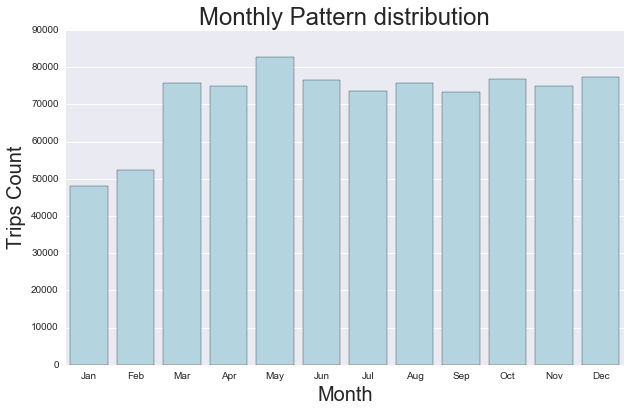

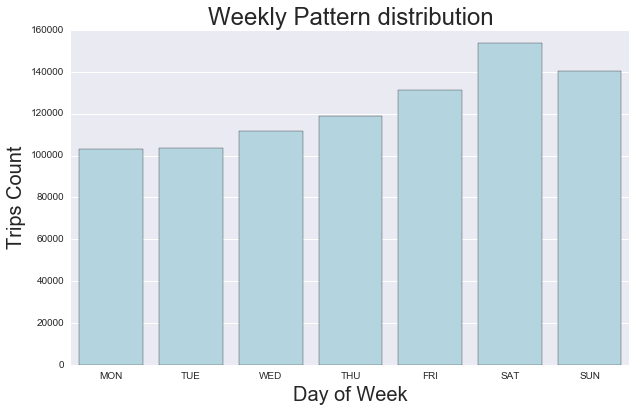

In [8]:
hst(df6,'month','m')
hst(df6,'dayofweek','w')


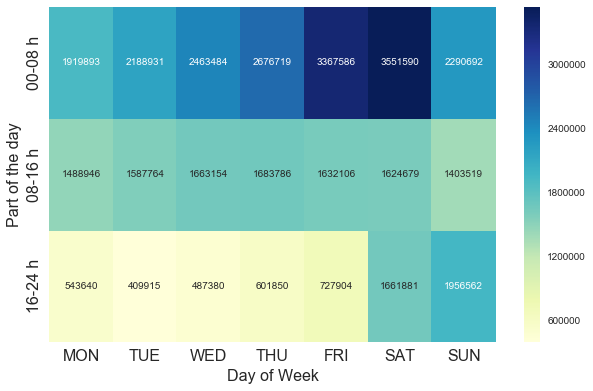

In [9]:
#################
##  Time Grid  ##
#################

timegrid = df6.groupby(['dayofweek','day_part'],as_index=False).agg({'Count': 'sum'})
# generate heatmap
timeheatmap = timegrid.pivot(index='day_part', columns='dayofweek', values='Count')
# Visualization
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(timeheatmap,annot=True, fmt="d",cbar=True, cmap="YlGnBu")
ax.invert_yaxis()
ax.axes.set_yticklabels(["16-24 h","08-16 h","00-08 h"],fontsize=16)
ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"],fontsize=16)
ax.set_xlabel("Day of Week",fontsize=16)
ax.set_ylabel("Part of the day",fontsize=16)
pass



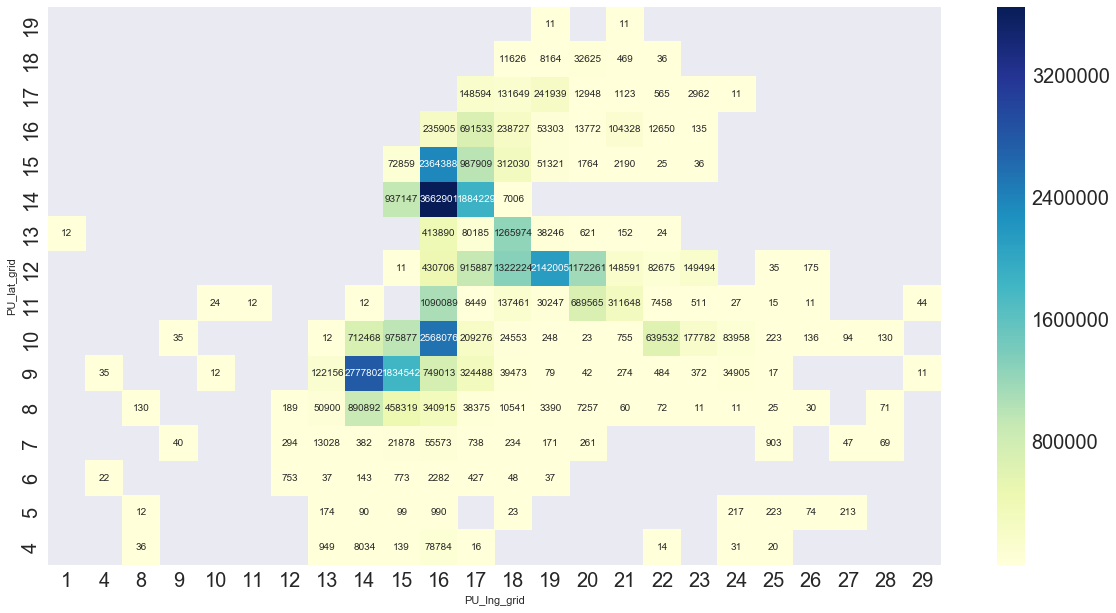

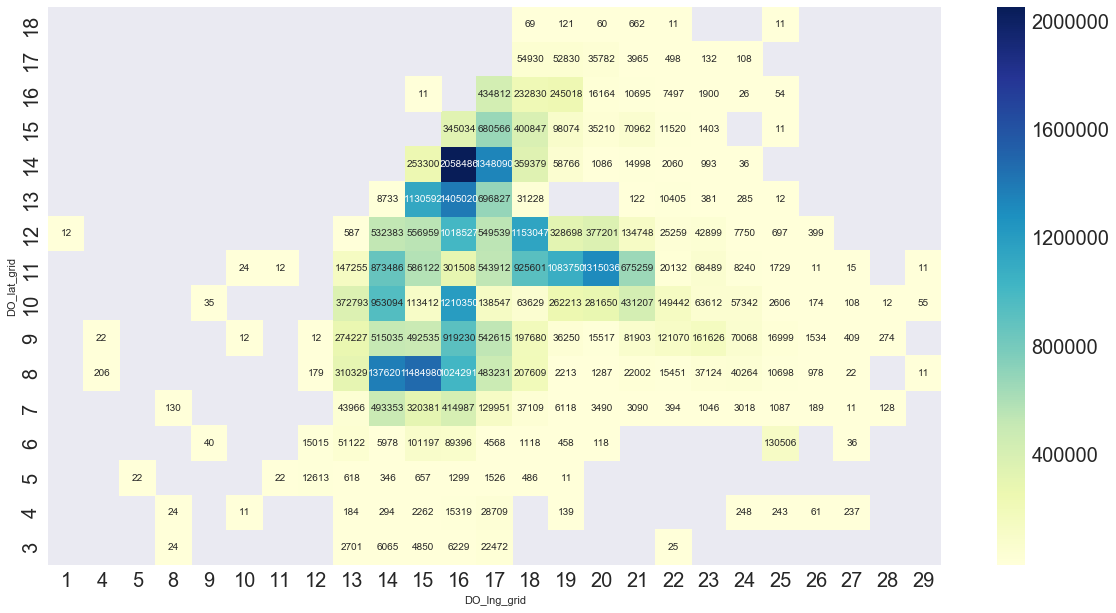

In [60]:
#################
##  Geo Grid   ##
#################

def grid_plot(df):
    geoheatmap = df.pivot(index=df.columns[0], columns=df.columns[1], values=df.columns[2])
    fig, ax = plt.subplots(figsize=(20,10))  
    ax = sns.heatmap(geoheatmap,annot=True,fmt=".0f",cbar=True, cmap="YlGnBu")
    ax.invert_yaxis()
    sns
    fig = ax.get_figure()

geogrid_PU = df6.groupby(['PU_lat_grid','PU_lng_grid'],as_index=False).agg({'Count': 'sum'})
grid_plot(geogrid_PU)

geogrid_DO = df6.groupby(['DO_lat_grid','DO_lng_grid'],as_index=False).agg({'Count': 'sum'})
grid_plot(geogrid_DO)


In [4]:
####################
## Label Encoding ##
####################
df7 = df6.copy()
df7.PU_lng_grid = df7.PU_lng_grid.astype('str')
df7.PU_lat_grid = df7.PU_lat_grid.astype('str')
df7.DO_lng_grid = df7.DO_lng_grid.astype('str')
df7.DO_lat_grid = df7.DO_lat_grid.astype('str')

df7['Route'] = df7.PU_lat_grid+"|"+df7.PU_lng_grid+"|"+ df7.DO_lat_grid+"|"+ df7.DO_lng_grid
le = preprocessing.LabelEncoder()
le.fit(df7.Route)
df7['Route_ID'] = le.transform(df7.Route)
df8 = df7.drop(['Route','PU_lng_grid','PU_lat_grid','DO_lng_grid','DO_lat_grid'],axis = 1)
df8 = df8[['year','month','day','dayofweek','day_part','Route_ID','Count']]



In [5]:
df6.head()

,year,month,day,dayofweek,day_part,PU_lat_grid,PU_lng_grid,DO_lat_grid,DO_lng_grid,Count
0,2014,1,1,3,0,4,16,4,17,14
1,2014,1,1,3,0,6,12,5,12,13
2,2014,1,1,3,0,7,13,7,14,17
3,2014,1,1,3,0,8,14,6,13,28
4,2014,1,1,3,0,8,14,6,15,24


In [6]:
df7.head()

,year,month,day,dayofweek,day_part,PU_lat_grid,PU_lng_grid,DO_lat_grid,DO_lng_grid,Count,Route,Route_ID
0,2014,1,1,3,0,4,16,4,17,14,4|16|4|17,2299
1,2014,1,1,3,0,6,12,5,12,13,6|12|5|12,2335
2,2014,1,1,3,0,7,13,7,14,17,7|13|7|14,2401
3,2014,1,1,3,0,8,14,6,13,28,8|14|6|13,2577
4,2014,1,1,3,0,8,14,6,15,24,8|14|6|15,2579


In [7]:
df8.head()

,year,month,day,dayofweek,day_part,Route_ID,Count
0,2014,1,1,3,0,2299,14
1,2014,1,1,3,0,2335,13
2,2014,1,1,3,0,2401,17
3,2014,1,1,3,0,2577,28
4,2014,1,1,3,0,2579,24


In [8]:
df10 = df8.groupby(['Route_ID']).size().reset_index(name='Count').sort_values('Count', ascending=False).reset_index().drop(['index'],axis=1)
df10.head(10)

,Route_ID,Count
0,1664,2137
1,1072,2137
2,988,2137
3,1557,2137
4,1492,2137
5,987,2137
6,1496,2137
7,1665,2137
8,1497,2136
9,989,2136


In [9]:
#frequent Route:
top_route = int(df8.Route_ID.value_counts().idxmax())

# filter df8 for only 1 route to learn
df11 = df8[(df8.Route_ID == top_route)].reset_index().drop(['index'],axis=1)
# To exclude the last month in the data when learning:
df12 = df11[(df11['year'] != 2015) | (df11['month'] != 12)]

In [10]:
df11.head()

,year,month,day,dayofweek,day_part,Route_ID,Count
0,2014,1,1,3,0,987,141
1,2014,1,1,3,1,987,56
2,2014,1,1,3,2,987,114
3,2014,1,2,4,0,987,37
4,2014,1,2,4,1,987,54


In [14]:
print("length of df12: ", len(df12))
df12.head()

length of df12:  2044


,year,month,day,dayofweek,day_part,Route_ID,Count
0,2014,1,1,3,0,987,141
1,2014,1,1,3,1,987,56
2,2014,1,1,3,2,987,114
3,2014,1,2,4,0,987,37
4,2014,1,2,4,1,987,54


## 4) Learning:

In [47]:
## Comparing 3 different models with train/test R2:

def run_regression_split(name,input_df):
    X = input_df.iloc[:,0:len(input_df.columns)-1]
    Y = input_df.iloc[:,-1]
    Y = Y.values.reshape(len(X))
    validation_size = 0.20
    seed = 0
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = validation_size, random_state = seed)
    
#    # Decision Tree model
#    model = DecisionTreeRegressor()
#    model.fit(X_train,Y_train)
#    R2 = model.score(X_train,Y_train)
#    R2_test = model.score(X_test,Y_test)
#    print("DataSet: {0}\tModel: {1}\t\tR2 train = {2:.3f}\tR2 test = {3:.3f}".format(name, str(model).split('(')[0], R2, R2_test))

    for est in [50]:
        for nodes in [2000]:
                ##########################
                ### Random forst Model ###
                ##########################
                model = RandomForestRegressor(n_estimators = 200, random_state = 0, max_leaf_nodes = nodes)
                model.fit(X_train,Y_train)
                R2 = model.score(X_train,Y_train)
                R2_test = model.score(X_test,Y_test)
                print("DataSet: {0}\tModel: {1}\t\t# of trees = {4} \tnodes = {5}\tR2 train = {2:.3f}\tR2 test = {3:.3f}".format(name, str(model).split('(')[0], R2, R2_test, est,nodes))
        
                ###############################
                ### Gradient Boosting Model ###
                ###############################
                model = GradientBoostingRegressor(n_estimators = 200, random_state = 0, max_leaf_nodes = nodes, learning_rate=0.01, loss='ls')
                model.fit(X_train,Y_train)
                R2 = model.score(X_train,Y_train)
                R2_test = model.score(X_test,Y_test)
                print("DataSet: {0}\tModel: {1}\t\t# of trees = {4} \tnodes = {5}\tR2 train = {2:.3f}\tR2 test = {3:.3f}".format(name, str(model).split('(')[0], R2, R2_test, est,nodes))
                
    
    

In [48]:
run_regression_split('df8',df8)

DataSet: df8	Model: RandomForestRegressor		# of trees = 50 	nodes = 2000	R2 train = 0.918	R2 test = 0.907
DataSet: df8	Model: GradientBoostingRegressor		# of trees = 50 	nodes = 2000	R2 train = 0.323	R2 test = 0.322


In [11]:
### Random forest Model without splitting ###
############################################
def run_regression(input_df):
    X = input_df.iloc[:,0:-1]
    Y = input_df.iloc[:,-1]
    Y = Y.values.reshape(len(X))
    model = RandomForestRegressor(n_estimators = 50, max_leaf_nodes = 2000,  random_state = 0)
    model.fit(X,Y)
    R2 = model.score(X,Y)
    y_hat = model.predict(X)
    mse = np.mean((Y - y_hat)**2)
    print('Model: {0}\t\tR2 = {1:.4f}\tmse = {2:.4f}'.format(str(model).split('(')[0], R2, mse))

    return model,y_hat

def run_prediction(input_df, regressor):
    X = input_df.iloc[:,0:-1]
    h = regressor.predict(X)
    return h

In [12]:
RF_regressor, y_hat = run_regression(df12)

Model: RandomForestRegressor		R2 = 0.9612	mse = 111.6979


## 5) Prediction

In [15]:
h = run_prediction(df11, RF_regressor)
h = pd.DataFrame(h, columns =['Predicted'])
h.head(10)

,Predicted
0,128.78
1,60.26
2,107.62
3,36.48
4,61.10
5,92.34
6,24.90
7,35.90
8,114.94
9,55.54


In [16]:
## Plotting the Actual Vs Predicted ##

# df20 concatinate df11 with the prediction
df20 = pd.concat([df11,h],axis = 1)

# df21 focus on the last month
df21 = df20[(df20['month'] == 12) & (df20['year'] == 2015)]

df21.head(10)

,year,month,day,dayofweek,day_part,Route_ID,Count,Predicted
2044,2015,12,1,2,0,987,24,46.84
2045,2015,12,1,2,1,987,72,68.66
2046,2015,12,1,2,2,987,134,128.04
2047,2015,12,2,3,0,987,38,49.30
2048,2015,12,2,3,1,987,56,68.70
2049,2015,12,2,3,2,987,84,126.16
2050,2015,12,3,4,0,987,54,57.52
2051,2015,12,3,4,1,987,57,65.84
2052,2015,12,3,4,2,987,105,146.10
2053,2015,12,4,5,0,987,79,55.10


In [17]:
# drop un-necessary columns:
df22 = df21.drop(['dayofweek','day_part','Route_ID','month','year'], axis = 1)

# sum the trips withing a day
df23 = df22.groupby(['day'], as_index=False).agg({'Count': 'sum', 'Predicted': 'sum'})
df23.head(30)

,day,Count,Predicted
0,1,230,243.54
1,2,178,244.16
2,3,216,269.46
3,4,304,305.20
4,5,419,399.24
5,6,439,433.78
6,7,240,271.56
7,8,202,236.74
8,9,198,245.20
9,10,198,294.06


In [18]:
x = df23.day
y = df23.Count
pred = df23.Predicted.apply(math.ceil)

### 5.2 Visualization

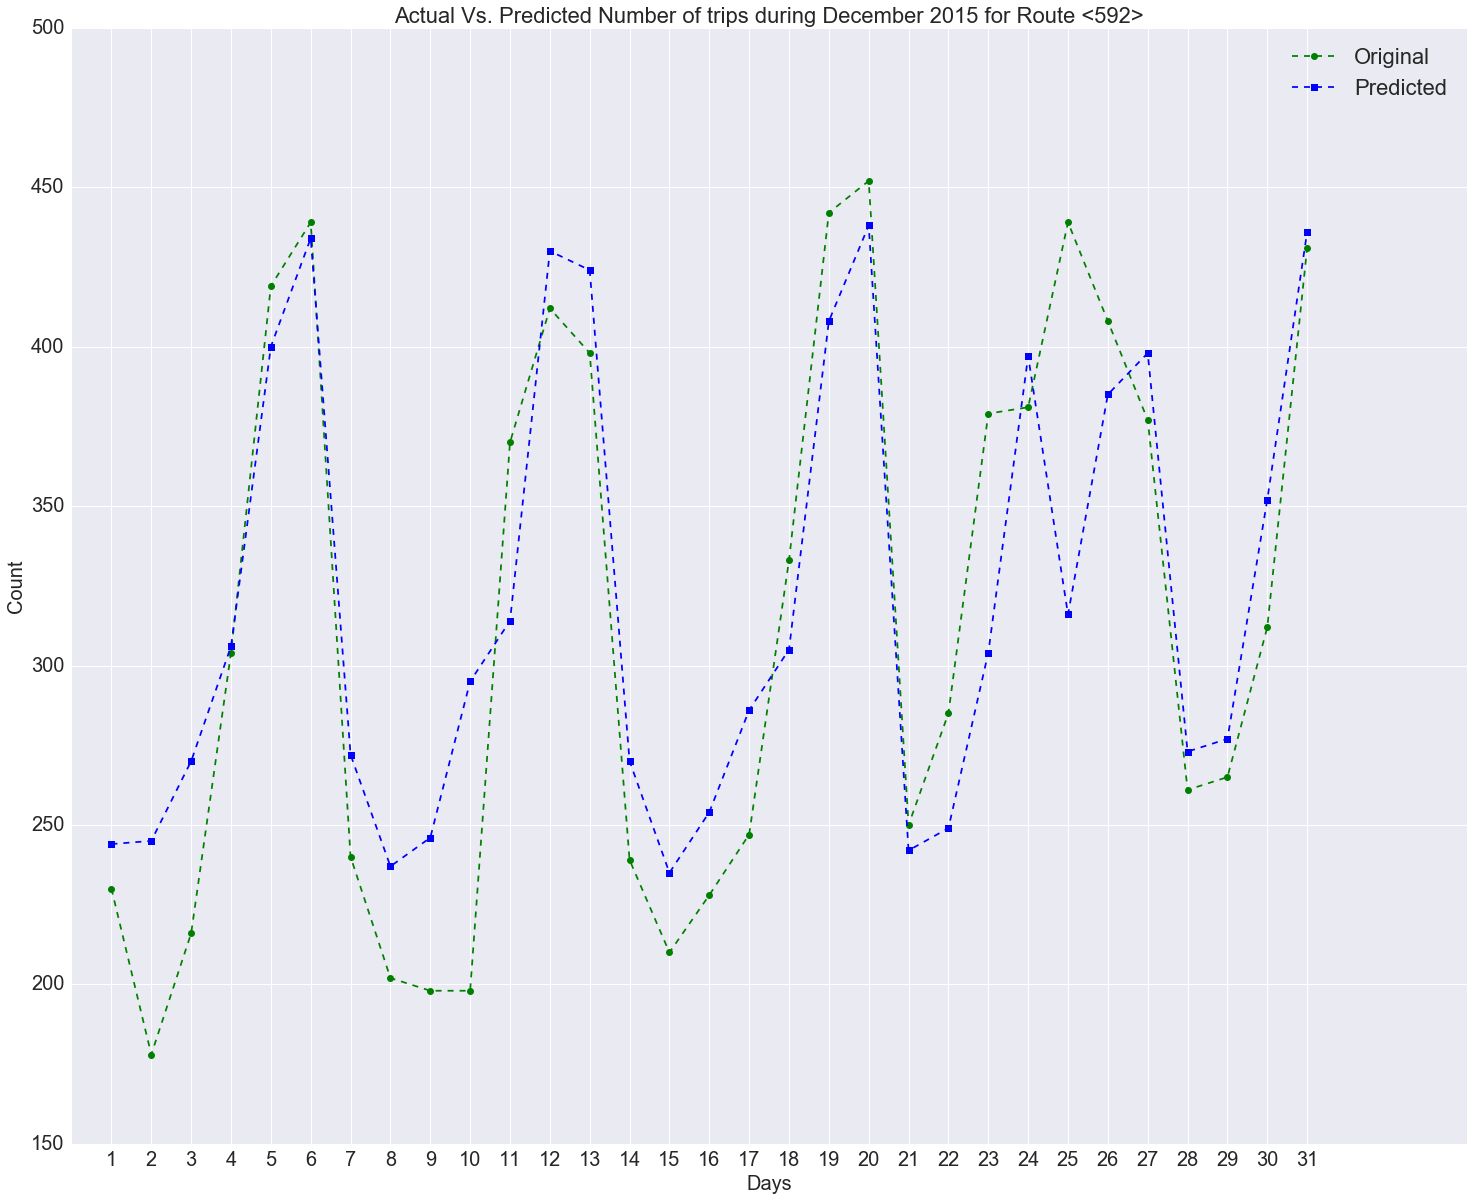

In [19]:
plt.figure(figsize=(25,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.plot(x, y, 'go--')
plt.plot(x, pred, 'bs--')

plt.legend(['Original','Predicted'],fontsize = 22)
plt.xlabel('Days', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Actual Vs. Predicted Number of trips during December 2015 for Route <592>', fontsize = 22)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

### 5.3 One day Prediction as a number

In [20]:
PU_lat = 7
PU_lng = 16
Route_ID = 1485
year = 2015
month = 12
day = 16
dayofweek = 3
day_part = 0

input_ = [(Route_ID ,year ,month ,day ,day_part ,dayofweek)]

prediction = math.ceil(RF_regressor.predict(input_)[0])
print(prediction)

161


### 5.4 One day Prediction on the map

In [27]:
###############################################################################
### ONE DAY PREDICTION ON MAP GRID ###
######################################

## 16/12/2015
## 

final_columns = ["year","month","day","dayofweek","day_part","lat_grid","lng_grid"]

# splitting df6 into 2 dataframes --> 1 for PU and 1 for DO
df6_PU = df6.drop(['DO_lat_grid','DO_lng_grid'],axis = 1)
df6_PU = df6_PU.groupby(['year','month','day','dayofweek','day_part','PU_lat_grid','PU_lng_grid'],as_index=False).agg({'Count': 'sum'})

df6_DO = df6.drop(['PU_lat_grid','PU_lng_grid'],axis = 1)
df6_DO = df6_DO.groupby(['year','month','day','dayofweek','day_part','DO_lat_grid','DO_lng_grid'],as_index=False).agg({'Count': 'sum'})


In [22]:
print("length of pickup dataframe: ",len(df6_PU))
df6_PU.head()

length of pickup dataframe:  108340


,year,month,day,dayofweek,day_part,PU_lat_grid,PU_lng_grid,Count
0,2014,1,1,3,0,4,16,14
1,2014,1,1,3,0,6,12,13
2,2014,1,1,3,0,7,13,17
3,2014,1,1,3,0,8,14,368
4,2014,1,1,3,0,8,15,125


In [23]:
print("length of pickup dataframe: ",len(df6_DO))
df6_DO.head()

length of pickup dataframe:  173682


,year,month,day,dayofweek,day_part,DO_lat_grid,DO_lng_grid,Count
0,2014,1,1,3,0,4,17,14
1,2014,1,1,3,0,5,12,13
2,2014,1,1,3,0,6,12,13
3,2014,1,1,3,0,6,13,40
4,2014,1,1,3,0,6,15,42


In [49]:
## Generating all possible lat/lng combinations for a single day:
singleday_DO = []
singleday_PU = []

row_base = [year,month,day,dayofweek] #base row with date 19 May 2017, Wednesday. Change it to get another day.

# For DO
for day_idx in range(24//hours_range):
    for idx,row in geogrid_DO.iterrows():
        singleday_DO.append(row_base+[day_idx,row['DO_lat_grid'],row['DO_lng_grid']])
singleday_DO = pd.DataFrame(singleday_DO,columns=final_columns)

# For PU
for day_idx in range(24//hours_range):
    for idx,row in geogrid_PU.iterrows():
        singleday_PU.append(row_base+[day_idx,row['PU_lat_grid'],row['PU_lng_grid']])
singleday_PU = pd.DataFrame(singleday_PU,columns=final_columns)

In [50]:
singleday_DO.head()

,year,month,day,dayofweek,day_part,lat_grid,lng_grid
0,2015,12,16,3,0,3,8
1,2015,12,16,3,0,3,13
2,2015,12,16,3,0,3,14
3,2015,12,16,3,0,3,15
4,2015,12,16,3,0,3,16


In [51]:
singleday_PU.head()

,year,month,day,dayofweek,day_part,lat_grid,lng_grid
0,2015,12,16,3,0,4,8
1,2015,12,16,3,0,4,13
2,2015,12,16,3,0,4,14
3,2015,12,16,3,0,4,15
4,2015,12,16,3,0,4,16


In [52]:
# we will pass generated data to scikit-learn model predict method to see the result

# run regression return 2 parameters, we need the regressor only, then predict the created dataframe.
model_DO, _ = run_regression(df6_DO)
model_PU, _ = run_regression(df6_PU)

prediction_DO = model_DO.predict(singleday_DO)
prediction_PU = model_PU.predict(singleday_PU)

singleday_DO_full = singleday_DO.copy()
singleday_DO_full['Count'] = prediction_DO

singleday_PU_full = singleday_PU.copy()
singleday_PU_full['Count'] = prediction_PU

Model: RandomForestRegressor		R2 = 0.9668	mse = 2510.5395
Model: RandomForestRegressor		R2 = 0.9786	mse = 5335.3004


In [54]:
singleday_DO_full.head()

,year,month,day,dayofweek,day_part,lat_grid,lng_grid,Count
0,2015,12,16,3,0,3,8,20.925899
1,2015,12,16,3,0,3,13,20.925899
2,2015,12,16,3,0,3,14,20.925899
3,2015,12,16,3,0,3,15,20.925899
4,2015,12,16,3,0,3,16,20.925899


In [55]:
singleday_PU_full.head()

,year,month,day,dayofweek,day_part,lat_grid,lng_grid,Count
0,2015,12,16,3,0,4,8,26.546965
1,2015,12,16,3,0,4,13,26.546965
2,2015,12,16,3,0,4,14,26.546965
3,2015,12,16,3,0,4,15,26.546965
4,2015,12,16,3,0,4,16,33.613674


Total number of Pick-UP  trips in selected day is :  65617.0


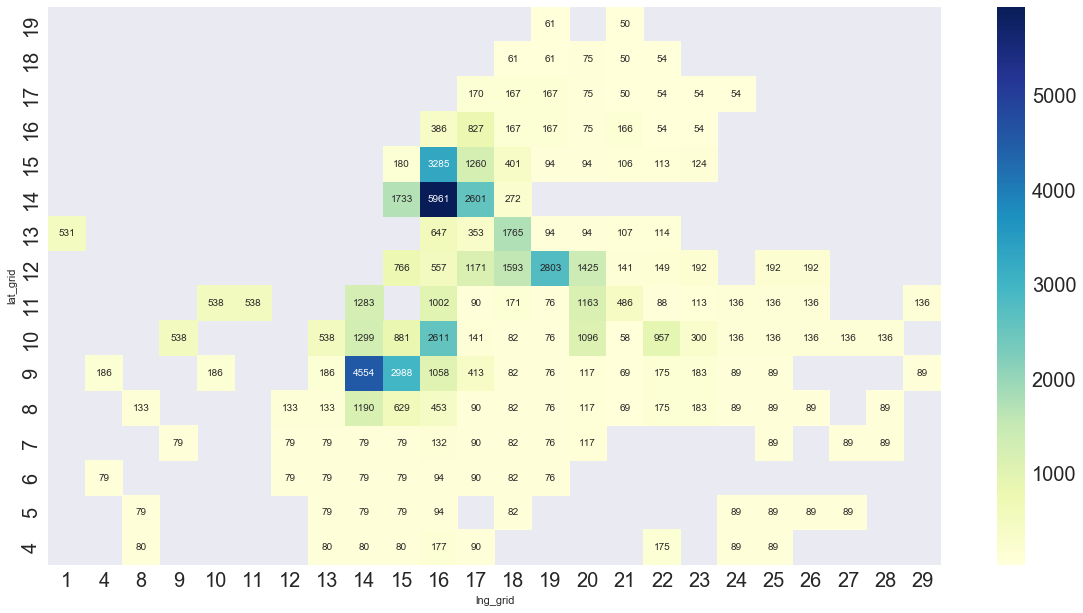

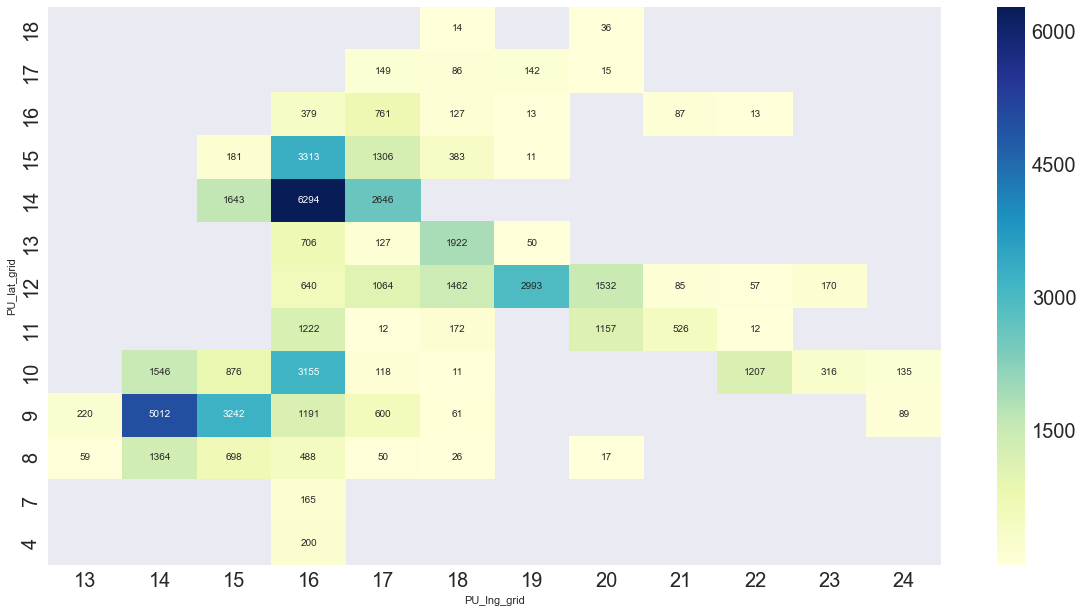

In [62]:
# Generating heatmap prediction for 1 day for PU

print ("Total number of Pick-UP  trips in selected day is : ", round(singleday_PU_full['Count'].sum()))

grid_PU = singleday_PU_full.groupby(['lat_grid','lng_grid']).agg({'Count': np.sum}).reset_index()
grid_plot(grid_PU)

###############################################################################
### ONE DAY ACTUAL DATA ON MAP GRID ###
#######################################

df_day = df6[(df6['year'] == year) & (df6['month'] == month) & (df6['day'] == day) & (df6['dayofweek'] == dayofweek)]
df_day = df_day.groupby(['PU_lat_grid','PU_lng_grid'],as_index=False).agg({'Count': 'sum'})
grid_plot(df_day)

Total number of Drop-Off trips in selected day is :  59347.0


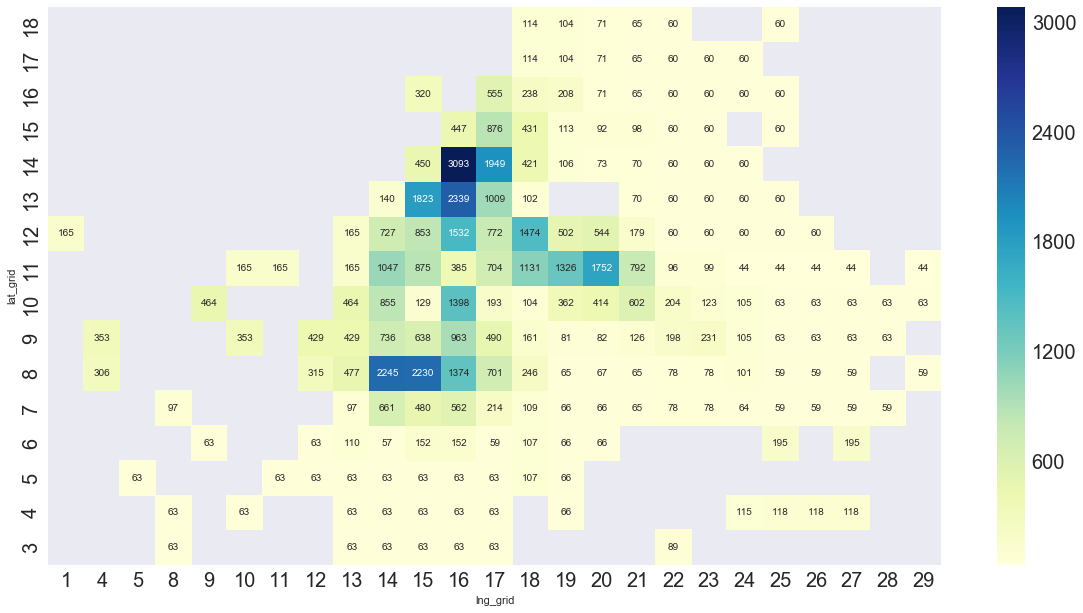

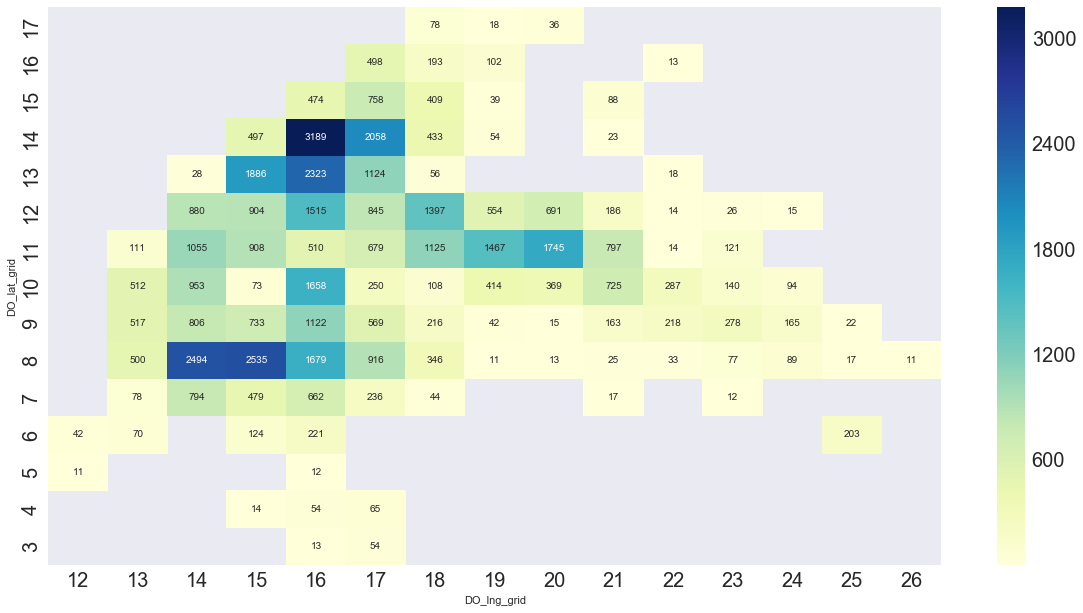

In [64]:
# Generating heatmap prediction for 1 day for DO
print ("Total number of Drop-Off trips in selected day is : ", round(singleday_DO_full['Count'].sum()))

grid_DO = singleday_DO_full.groupby(['lat_grid','lng_grid']).agg({'Count': np.sum}).reset_index()
grid_plot(grid_DO)
    
###############################################################################
### ONE DAY ACTUAL DATA ON MAP GRID ###
#######################################

df_day = df6[(df6['year'] == year) & (df6['month'] == month) & (df6['day'] == day) & (df6['dayofweek'] == dayofweek)]
df_day = df_day.groupby(['DO_lat_grid','DO_lng_grid'],as_index=False).agg({'Count': 'sum'})
grid_plot(df_day)